In [1]:
%matplotlib inline
%matplotlib notebook

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')

from analyser import *

# Import Data

In [2]:
#subs = generate_submissions(users=50, pbls=4)
subs = import_submissions(course_id = "C00198", dbname="test1")

In [3]:
mat = bianary_mat(subs)
#mat = succes_mat(subs)
mat2 = pd.read_csv("c00198_ratio.csv", index_col=0)
mat2 = mat2.applymap(lambda x: float(x.replace(',', '.')))

# Linear evaluation

## Initialisation

In [4]:
LinDiff = pd.Series([1.0 for i in range(len(mat.index))], 
                    index=mat.index, name='Diff_Bin_0')
normalize(LinDiff)
LinAbil = pd.Series([1.0 for i in range(len(mat.columns))], 
                    index=mat.columns, name='Abil_Bin_0')
normalize(LinAbil)

## Evaluation (10 iterations)

In [5]:
cnt = 10
for i in range(1,1+cnt):
    LinDiff = process_bianary_mat(mat, LinAbil, 
                    name="%s%d" % (LinDiff.name[:-1],i))
    LinAbil = process_bianary_mat(mat, LinDiff, 
                    name="%s%d" % (LinAbil.name[:-1],i), Horiz=True)

# SVD evaluation

In [6]:
npmat = mat.as_matrix()
U, s, V = np.linalg.svd(npmat, full_matrices=False)

In [7]:
U = pd.DataFrame(U, index=mat.index)
SvdDiff = pd.Series(U[0], index=mat.index, name="Diff_svd")
SvdDiff = SvdDiff.apply(abs)

In [8]:
SvdAbil = pd.Series(V[0], index=mat.columns, name="Abil_svd")
SvdAbil = SvdAbil.apply(abs)

# Comarison (Linear vs SVD)

In [9]:
Abilities = pd.DataFrame([SvdAbil, LinAbil]).T

<IPython.core.display.Javascript object>


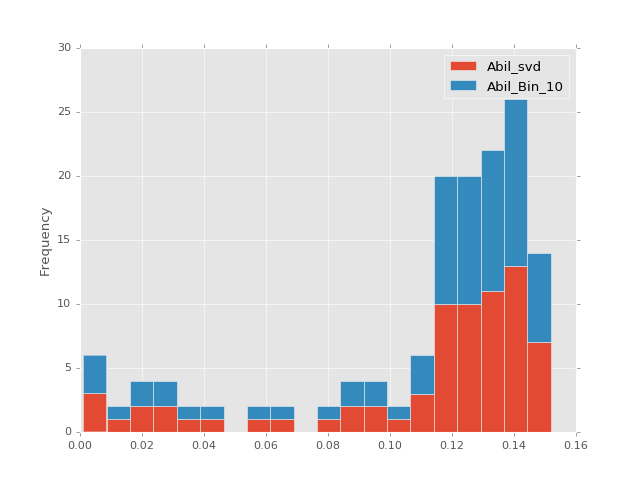

In [10]:
Abilities.plot.hist(stacked=True,bins=20)

<IPython.core.display.Javascript object>


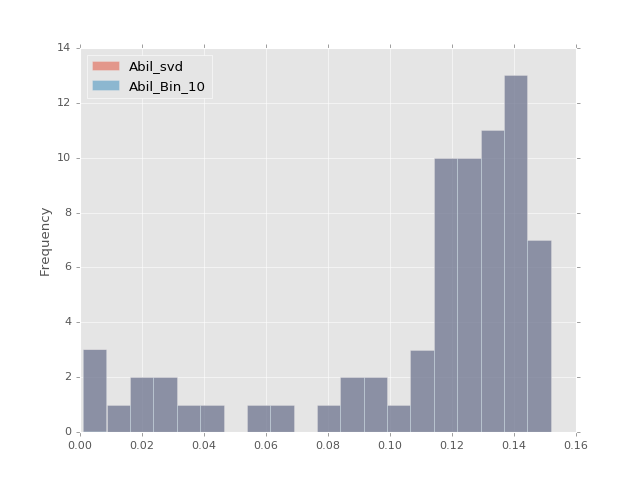

In [11]:
Abilities.plot.hist(stacked=False,bins=20, alpha=0.5)

**Superposition parfaite !!!**

In [12]:
Difficulties = pd.DataFrame([SvdDiff, LinDiff]).T

<IPython.core.display.Javascript object>


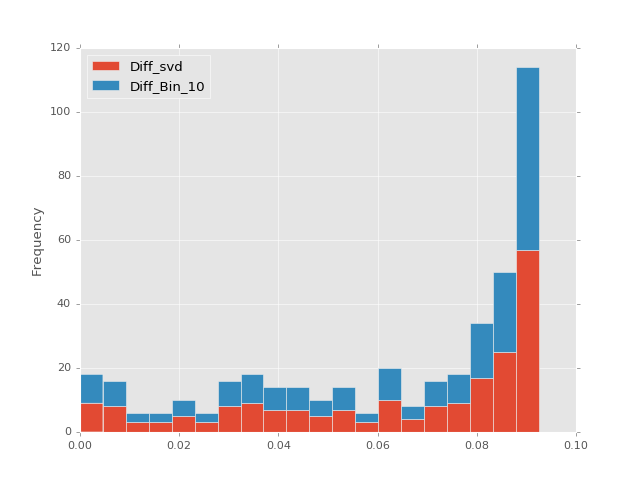

In [13]:
Difficulties.plot.hist(stacked=True,bins=20)

<IPython.core.display.Javascript object>


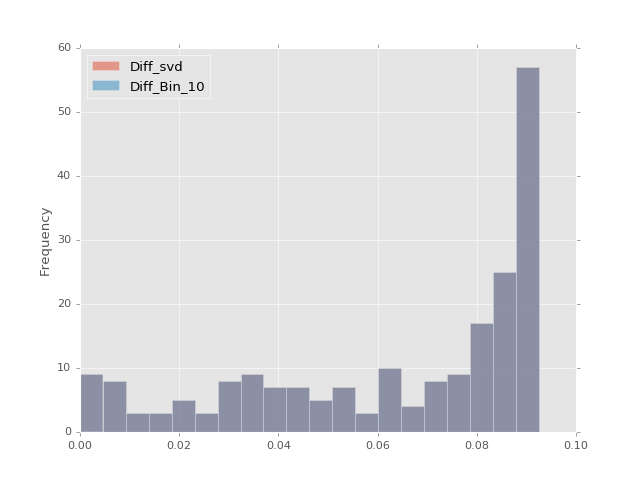

In [14]:
Difficulties.plot.hist(stacked=False,bins=20, alpha=0.5)

# Comparison Linears (Bin vs Means)

In [15]:
LinDiffMeans = pd.Series([1.0 for i in range(len(mat2.index))], 
                    index=mat2.index, name='Diff_Means_0')
normalize(LinDiffMeans)
LinAbilMeans = pd.Series([1.0 for i in range(len(mat2.columns))], 
                    index=mat2.columns, name='Abil_Means_0')
normalize(LinAbilMeans)

In [16]:
cnt = 10
for i in range(1,1+cnt):
    LinDiffMeans = process_bianary_mat(mat2, LinAbilMeans, 
                    name="%s%d" % (LinDiffMeans.name[:-1],i))
    LinAbilMeans = process_bianary_mat(mat2, LinDiffMeans, 
                    name="%s%d" % (LinAbilMeans.name[:-1],i), Horiz=True)

In [17]:
Abilities = pd.DataFrame([LinAbil, LinAbilMeans]).T

<IPython.core.display.Javascript object>


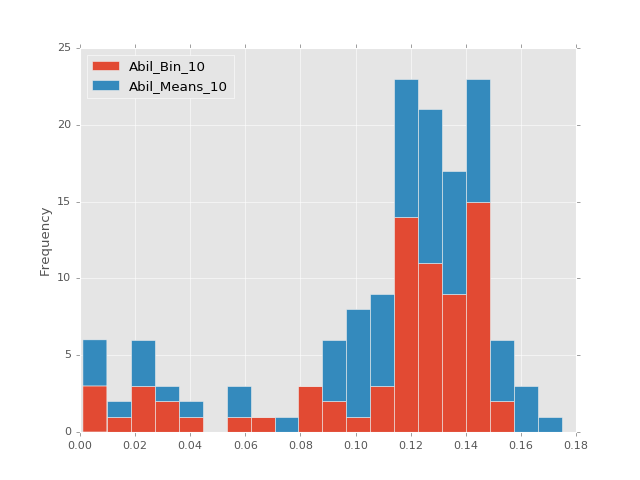

In [18]:
Abilities.plot.hist(stacked=True,bins=20)

<IPython.core.display.Javascript object>


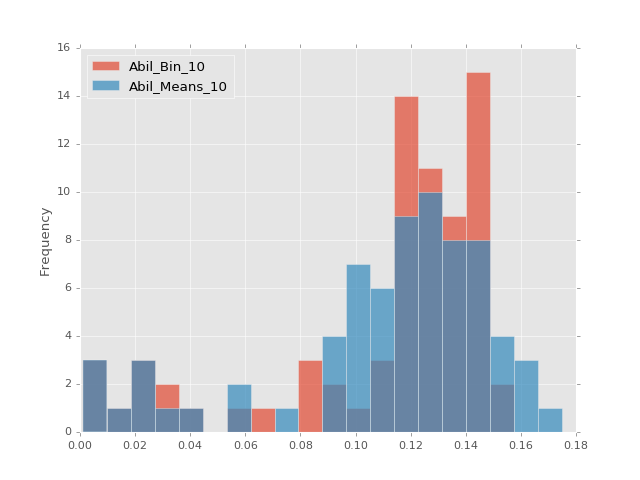

In [19]:
Abilities.plot.hist(stacked=False,bins=20, alpha=0.7)

In [20]:
Difficulties = pd.DataFrame([LinDiff, LinDiffMeans]).T

<IPython.core.display.Javascript object>


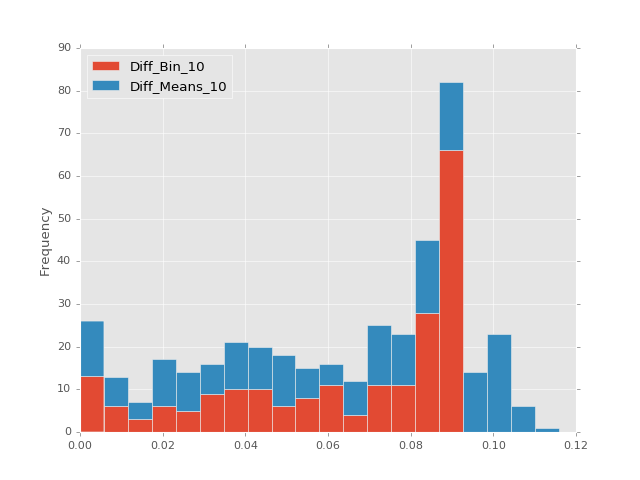

In [21]:
Difficulties.plot.hist(stacked=True,bins=20)

<IPython.core.display.Javascript object>


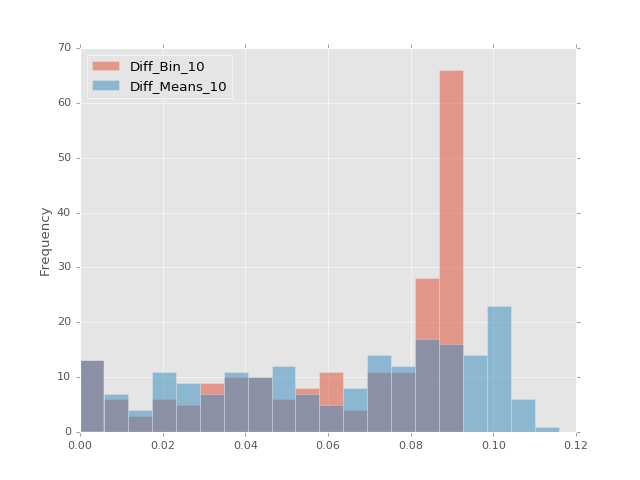

In [22]:
Difficulties.plot.hist(stacked=False,bins=20, alpha=0.5)

<IPython.core.display.Javascript object>


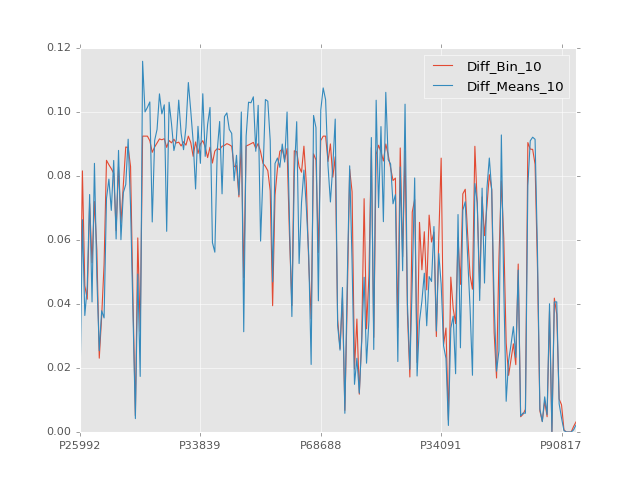

In [24]:
Difficulties.plot()

# Comparison SVDs (Bin vs Means)

In [73]:
npmat = mat2.as_matrix()
U, s, V = np.linalg.svd(npmat, full_matrices=False)
U = pd.DataFrame(U, index=mat.index)
SvdDiffMeans = pd.Series(U[0], index=mat.index, name="Diff_svd_Means")
SvdDiffMeans = SvdDiffMeans.apply(abs)
SvdAbilMeans = pd.Series(V[0], index=mat.columns, name="Abil_svd_Means")
SvdAbilMeans = SvdAbilMeans.apply(abs)

In [77]:
Difficulties = pd.DataFrame([SvdDiff, SvdDiffMeans]).T

<IPython.core.display.Javascript object>


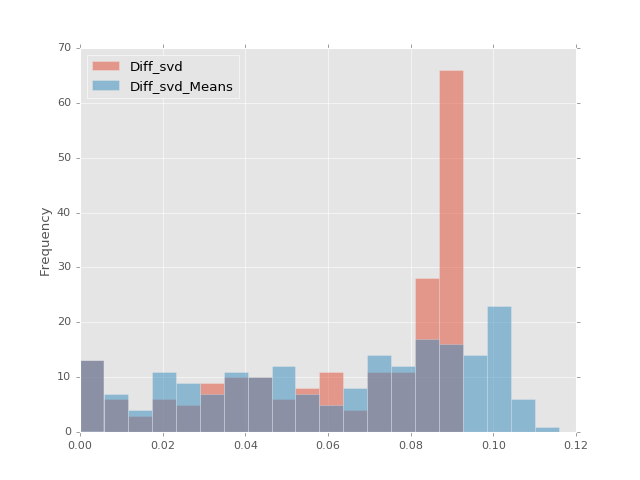

In [80]:
Difficulties.plot.hist(stacked=False,bins=20, alpha=0.5)